In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
xdim = 121
ydim = 101

## Load topography
topo   = np.loadtxt('data/DEM_PF_10m_cut.dat',skiprows=6)
dx = 10
dy = 10
xx = np.arange(0.,2100.+dx,dx)
yy = np.arange(0.,1800.+dy,dy)
levels = np.arange(2190., 2650, 20)
### Load stations
srcs = np.loadtxt('data/stations.txt')
stas_array = ['BON','BOR','DSO','SNE']

xmin =  640.
xmax = 1840.
ymin =  400.
ymax = 1400.

In [67]:
### FREQUENCY COMPARISON
filename  = 'resolution_exp_ENZ_'
#filename  = 'resolution_exp_Z_noise_normal3277e-26_rmSingularity_'
freqbands = ['BP3to7', 'BP8to12', 'BP13to17']

BP3to7
median(xhalf) =  55.667968636322286
median(xhalf_err) =  0.8371994593494337
median error of xhalf:           1.5452044581047235 %
BP8to12
median(xhalf) =  50.820902597667896
median(xhalf_err) =  0.7521311207027617
median error of xhalf:           1.4486370245013722 %
BP13to17
median(xhalf) =  54.72205713724781
median(xhalf_err) =  0.7582127994081007
median error of xhalf:           1.3486671276410211 %


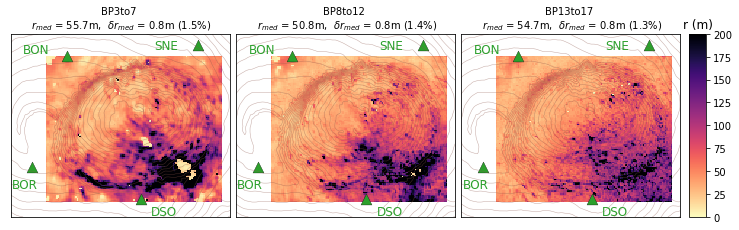

In [68]:
decay_level = 0.75

fig, axes = plt.subplots(1, 3, figsize=(12,4.2))
for fb, ax_im in zip(freqbands, axes):
    
    data = pd.read_csv('resolution/'+filename+fb+'.csv')
    data['xhalf'] = np.log(decay_level)/data.res_k
    data['xhalf'] = data['xhalf'].fillna(10000.)
    data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err
    #data.xhalf[data.res_k_err > 0.05*np.abs(data.res_k)] = 10000.
    
    res = np.flipud(np.reshape(np.array(data.xhalf),(ydim,xdim)))
    
    data['error'] = np.abs(100/data['res_k']*data['res_k_err'])
    data['xhalf_error'] = 100/data['xhalf']*data['xhalf_err']

    print(fb)
    print('median(xhalf) = ', data['xhalf'].median())
    print('median(xhalf_err) = ', data['xhalf_err'].median())
    print('median error of xhalf:          ', (data['xhalf_error'].median()), '%')
    #print('median(b) = ', data['res_b'].median())
    
    #PLOTTING
    im = ax_im.imshow(res,
                      vmin=0., vmax=200.,
                      extent=[xmin, xmax, ymin, ymax],
                      #interpolation='bicubic',
                      #interpolation='hermite',
                      cmap='magma_r')
    c0 = ax_im.contour(xx, yy, np.flipud(topo),levels, colors='C5', alpha=0.5,linewidths=0.5)

    bbox = dict(boxstyle='round', fc='1',alpha=0.7,lw=0)
    ax_im.scatter(srcs[:,0], srcs[:,1],
        marker='^', c='C2', s=120, edgecolor='k',linewidth=0.3)
    for iista, sta in enumerate(stas_array):
        if iista == 0:
            xanno = -300.
            yanno =   20.
        elif iista == 1:
            xanno = -140.
            yanno = -150.
        elif iista == 2:
            xanno =   70.
            yanno = -110.
        elif iista == 3:
            xanno = -300.
            yanno =  -30.
        anno = (stas_array[iista])
        ax_im.annotate(anno, xy=(srcs[iista,0],srcs[iista,1]),
                xytext=(srcs[iista,0]+xanno,srcs[iista,1]+yanno),
                size=12, color='C2')

    ax_im.set_xlim(xx[0]+400., xx[-1]-200.)
    ax_im.set_ylim(yy[0]+300., yy[-1]-250.)
    
    ax_im.set_xticks([])
    ax_im.set_yticks([])
    
    ax_im.set_title(
        '{} \n $r_{{med}}$ = {:.1f}m,  $\delta r_{{med}}$ = {:.1f}m ({:.1f}%)'.format(
        fb, 
        data['xhalf'].median(),
        data['xhalf_err'].median() ,
        data['xhalf_error'].median() ),
        fontsize=10
                   )
    
    
    picks = [3398, 5606, 9959, 9896, 4069]
    #picks = [9896]
    picks = [3000]   
    xpicks = np.array(data.x[picks])
    ypicks = np.array(data.y[picks])
    #ax_im.scatter(xpicks, ypicks, s=5, facecolors='none', edgecolors='C0')
    

ax_cb = fig.add_axes([0.91,0.2,0.02,0.605])
cb = plt.colorbar(im, cax=ax_cb)
ax_cb.set_title('r (m)')
#cb = plt.colorbar(im)
#cb.set_label('Resolution proxy (m)')

fig.subplots_adjust(wspace=0.03)
fig.savefig('resolution/paper/resolution_frequency_comparison_w_ENZ.png', bbox_inches = 'tight', dpi=200)




In [34]:
### CHANNEL COMPARISON
filename1 = 'resolution_exp_'
filename2 = '_BONBORSNE_noise_normal3277e-26_rmSingularity_BP13to17'
filename2 = '_BONBORSNE'
channels = ['ENZ', 'E', 'N', 'Z']

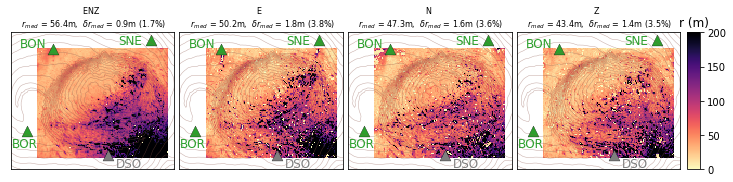

In [53]:
decay_level = 0.75

fig, axes = plt.subplots(1, 4, figsize=(12,4.2))
for ch, ax_im in zip(channels, axes):
    
    data = pd.read_csv('resolution/'+filename1+ch+filename2+'.csv')
    data['xhalf'] = np.log(decay_level)/data.res_k
    data['xhalf'] = data['xhalf'].fillna(10000.)
    data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err
    #data.xhalf[data.res_k_err > 0.05*np.abs(data.res_k)] = 10000.
    
    
    res = np.flipud(np.reshape(np.array(data.xhalf),(ydim,xdim)))
    
    data['error'] = np.abs(100/data['res_k']*data['res_k_err'])
    data['xhalf_error'] = 100/data['xhalf']*data['xhalf_err']

    """
    print(ch)
    print('median(xhalf) = ', data['xhalf'].median())
    print('median(xhalf_err) = ', data['xhalf_err'].median())
    print('median error of xhalf:          ', (data['xhalf_error'].median()), '%')
    print('median(b) = ', data['res_b'].median())
    """
    
    #PLOTTING
    im = ax_im.imshow(res,
                      vmin=0., vmax=200.,
                      extent=[xmin, xmax, ymin, ymax],
                      #interpolation='bicubic',
                      #interpolation='hermite',
                      cmap='magma_r')
    c0 = ax_im.contour(xx, yy, np.flipud(topo),levels, colors='C5', alpha=0.5,linewidths=0.5)

    bbox = dict(boxstyle='round', fc='1',alpha=0.7,lw=0)
    for iista, sta in enumerate(stas_array):
        if sta == 'DSO':
            c = 'C7'
        else:
            c = 'C2'
        ax_im.scatter(srcs[iista,0], srcs[iista,1],
                      marker='^', c=c, s=120, edgecolor='k',linewidth=0.3)
        if iista == 0:
            xanno = -300.
            yanno =   20.
        elif iista == 1:
            xanno = -140.
            yanno = -150.
        elif iista == 2:
            xanno =   70.
            yanno = -110.
        elif iista == 3:
            xanno = -300.
            yanno =  -30.
        anno = (stas_array[iista])
        ax_im.annotate(anno, xy=(srcs[iista,0],srcs[iista,1]),
                xytext=(srcs[iista,0]+xanno,srcs[iista,1]+yanno),
                size=12, color=c)

    ax_im.set_xlim(xx[0]+400., xx[-1]-200.)
    ax_im.set_ylim(yy[0]+300., yy[-1]-250.)
    
    ax_im.set_xticks([])
    ax_im.set_yticks([])
    
    ax_im.set_title(
        '{} \n $r_{{med}}$ = {:.1f}m,  $\delta r_{{med}}$ = {:.1f}m ({:.1f}%)'.format(
        ch, 
        data['xhalf'].median(),
        data['xhalf_err'].median() ,
        data['xhalf_error'].median() ),
        fontsize=8
                   )


ax_cb = fig.add_axes([0.908,0.276,0.015,0.451])
cb = plt.colorbar(im, cax=ax_cb)
ax_cb.set_title('r (m)')
#cb = plt.colorbar(im)
#cb.set_label('Resolution proxy (m)')

fig.subplots_adjust(wspace=0.03)
fig.savefig('resolution/paper/resolution_channel_comparison_w.png', bbox_inches = 'tight', dpi=200)




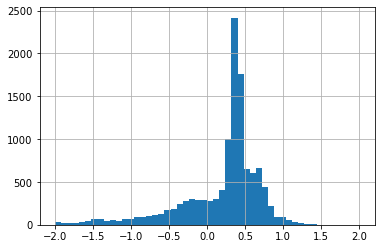

In [23]:
data = pd.read_csv('resolution/resolution_exp_ENZ_BONBORSNE.csv')
#data = pd.read_csv('resolution/resolution_exp_ENZ_BONBORSNE_noise_normal3277e-26_rmSingularity_BP13to17.csv')
data['xhalf'] = np.log(decay_level)/data.res_k
data['xhalf'] = data['xhalf'].fillna(10000.)
data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err

#data['xhalf'].replace([np.inf, -np.inf], np.nan).dropna().hist(range=(0, 200))
data['res_b'].hist(bins=50, range=(-2, 2))

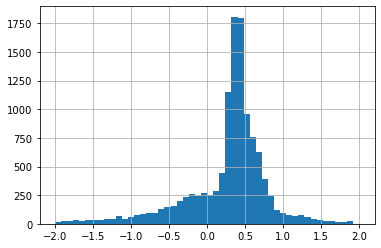

In [22]:
data = pd.read_csv('resolution/resolution_exp_Z_BONBORSNE.csv')
#data = pd.read_csv('resolution/resolution_exp_Z_BONBORSNE_noise_normal3277e-26_rmSingularity_BP13to17.csv')
data['xhalf'] = np.log(decay_level)/data.res_k
data['xhalf'] = data['xhalf'].fillna(10000.)
data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err

#data['xhalf'].replace([np.inf, -np.inf], np.nan).dropna().hist(range=(0, 200))
data['res_b'].hist(bins=50, range=(-2, 2))

In [263]:
### COMBI COMPARISON 2
filename1 = 'resolution_exp_'
filename2 = '_noise_normal3277e-26_rmSingularity_BP13to17'
channels = ['ENZ', 'Z']

ENZ
median(xhalf) =  54.72205713724781
median(xhalf_err) =  0.7582127994081007
median error of xhalf:           1.3486671276410211 %
Z
median(xhalf) =  44.56898076447938
median(xhalf_err) =  0.7708539392785532
median error of xhalf:           1.7473093572596945 %


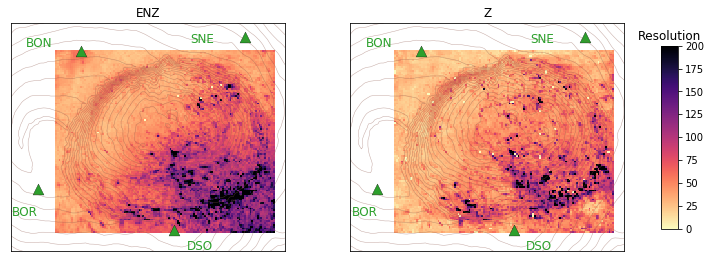

In [264]:
decay_level = 0.75

fig, axes = plt.subplots(1, 2, figsize=(12,4.2))
for ch, ax_im in zip(channels, axes):
    
    data = pd.read_csv('resolution/'+filename1+ch+'_BP13to17.csv')
    data['xhalf'] = np.log(decay_level)/data.res_k
    data['xhalf'] = data['xhalf'].fillna(10000.)
    data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err
    #data.xhalf[data.res_k_err > 0.05*np.abs(data.res_k)] = 10000.
    
    
    res = np.flipud(np.reshape(np.array(data.xhalf),(ydim,xdim)))
    
    data['error'] = np.abs(100/data['res_k']*data['res_k_err'])
    data['xhalf_error'] = 100/data['xhalf']*data['xhalf_err']

    print(ch)
    print('median(xhalf) = ', data['xhalf'].median())
    print('median(xhalf_err) = ', data['xhalf_err'].median())
    print('median error of xhalf:          ', (data['xhalf_error'].median()), '%')
    #print('median(b) = ', data['res_b'].median())
    
    #PLOTTING
    im = ax_im.imshow(res,
                      vmin=0., vmax=200.,
                      extent=[xmin, xmax, ymin, ymax],
                      #interpolation='bicubic',
                      #interpolation='hermite',
                      cmap='magma_r')
    c0 = ax_im.contour(xx, yy, np.flipud(topo),levels, colors='C5', alpha=0.5,linewidths=0.5)

    bbox = dict(boxstyle='round', fc='1',alpha=0.7,lw=0)
    for iista, sta in enumerate(stas_array):
        c = 'C2'
        ax_im.scatter(srcs[iista,0], srcs[iista,1],
                      marker='^', c=c, s=120, edgecolor='k',linewidth=0.3)
        if iista == 0:
            xanno = -300.
            yanno =   20.
        elif iista == 1:
            xanno = -140.
            yanno = -150.
        elif iista == 2:
            xanno =   70.
            yanno = -110.
        elif iista == 3:
            xanno = -300.
            yanno =  -30.
        anno = (stas_array[iista])
        ax_im.annotate(anno, xy=(srcs[iista,0],srcs[iista,1]),
                xytext=(srcs[iista,0]+xanno,srcs[iista,1]+yanno),
                size=12, color=c)

    ax_im.set_xlim(xx[0]+400., xx[-1]-200.)
    ax_im.set_ylim(yy[0]+300., yy[-1]-250.)
    
    ax_im.set_xticks([])
    ax_im.set_yticks([])
    
    ax_im.set_title(ch)


ax_cb = fig.add_axes([0.91,0.2,0.02,0.605])
cb = plt.colorbar(im, cax=ax_cb)
ax_cb.set_title('Resolution')
#cb = plt.colorbar(im)
#cb.set_label('Resolution proxy (m)')

fig.subplots_adjust(wspace=0.03)
fig.savefig('resolution/paper/resolution_combi_comparison_2_w.png', bbox_inches = 'tight', dpi=200)




In [59]:
### COMBI COMPARISON
filename1 = 'resolution_exp_Z_'
stations = ['BONBORDSO', 'BONBORSNE', 'BONDSOSNE', 'BORDSOSNE']

BONBORDSO
median(xhalf) =  43.407920940079215
median(xhalf_err) =  1.9856477455004662
median error of xhalf:           4.841002072202688 %
BONBORSNE
median(xhalf) =  43.404425510152485
median(xhalf_err) =  1.435616377515942
median error of xhalf:           3.5207872984102506 %
BONDSOSNE
median(xhalf) =  43.55068732292001
median(xhalf_err) =  1.3752130464733094
median error of xhalf:           3.4045623006050043 %
BORDSOSNE
median(xhalf) =  45.18361003675145
median(xhalf_err) =  1.686989503882846
median error of xhalf:           3.9943838352905146 %


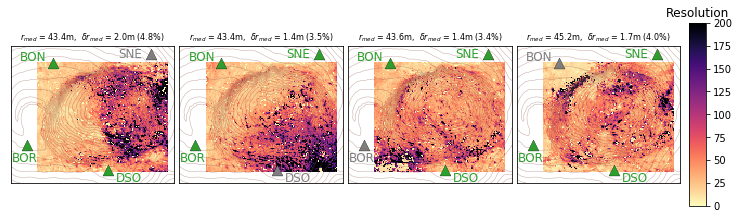

In [60]:
decay_level = 0.75
eliminate = ['SNE', 'DSO', 'BOR', 'BON']

fig, axes = plt.subplots(1, 4, figsize=(12,4.2))
for stat, ax_im, eli in zip(stations, axes, eliminate):
    
    data = pd.read_csv('resolution/'+filename1+stat+'.csv')
    data['xhalf'] = np.log(decay_level)/data.res_k
    data['xhalf'] = data['xhalf'].fillna(10000.)
    data['xhalf_err'] = - np.log(decay_level)/(data.res_k**2) * data.res_k_err
    #data.xhalf[data.res_k_err > 0.05*np.abs(data.res_k)] = 10000.
    
    res = np.flipud(np.reshape(np.array(data.xhalf),(ydim,xdim)))
    
    data['error'] = np.abs(100/data['res_k']*data['res_k_err'])
    data['xhalf_error'] = 100/data['xhalf']*data['xhalf_err']

    print(stat)
    print('median(xhalf) = ', data['xhalf'].median())
    print('median(xhalf_err) = ', data['xhalf_err'].median())
    print('median error of xhalf:          ', (data['xhalf_error'].median()), '%')
    #print('median(b) = ', data['res_b'].median())
    
    #PLOTTING
    im = ax_im.imshow(res,
                      vmin=0., vmax=200.,
                      extent=[xmin, xmax, ymin, ymax],
                      #interpolation='bicubic',
                      #interpolation='hermite',
                      cmap='magma_r')
    c0 = ax_im.contour(xx, yy, np.flipud(topo),levels, colors='C5', alpha=0.5,linewidths=0.5)

    bbox = dict(boxstyle='round', fc='1',alpha=0.7,lw=0)
    for iista, sta in enumerate(stas_array):
        if sta == eli:
            c_eli = 'C7'
        else:
            c_eli = 'C2'
        ax_im.scatter(srcs[iista,0], srcs[iista,1],
            marker='^', c=c_eli, s=120, edgecolor='k',linewidth=0.3)
        if iista == 0:
            xanno = -300.
            yanno =   20.
        elif iista == 1:
            xanno = -140.
            yanno = -150.
        elif iista == 2:
            xanno =   70.
            yanno = -110.
        elif iista == 3:
            xanno = -300.
            yanno =  -30.
        anno = (stas_array[iista])
        ax_im.annotate(anno, xy=(srcs[iista,0],srcs[iista,1]),
                xytext=(srcs[iista,0]+xanno,srcs[iista,1]+yanno),
                size=12, color=c_eli)

    ax_im.set_xlim(xx[0]+400., xx[-1]-200.)
    ax_im.set_ylim(yy[0]+300., yy[-1]-250.)
    
    ax_im.set_xticks([])
    ax_im.set_yticks([])
    
    ax_im.set_title(
        '$r_{{med}}$ = {:.1f}m,  $\delta r_{{med}}$ = {:.1f}m ({:.1f}%)'.format( 
        data['xhalf'].median(),
        data['xhalf_err'].median() ,
        data['xhalf_error'].median() ),
        fontsize=8
                   )

ax_cb = fig.add_axes([0.91,0.2,0.02,0.605])
cb = plt.colorbar(im, cax=ax_cb)
ax_cb.set_title('Resolution')
#cb = plt.colorbar(im)
#cb.set_label('Resolution proxy (m)')

fig.subplots_adjust(wspace=0.03)
fig.savefig('resolution/paper/resolution_combi_comparison_w.png', bbox_inches = 'tight', dpi=200)


